In [32]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

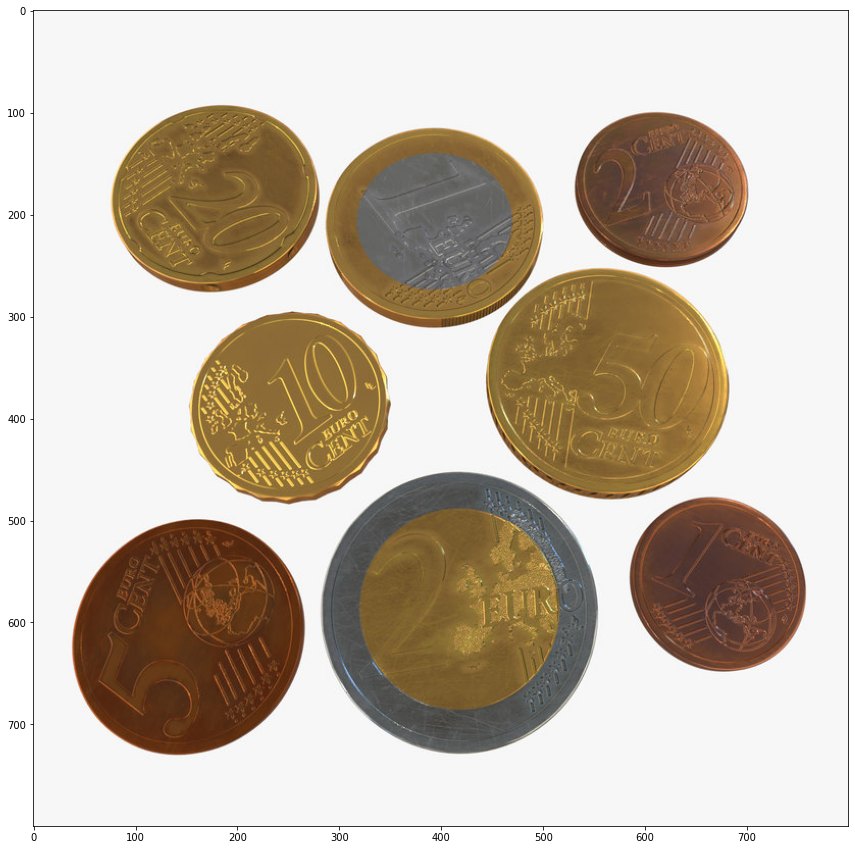

In [33]:
coins = cv2.imread("img/coins5.jpg")
rgb_coins = cv2.cvtColor(coins,cv2.COLOR_BGR2RGB)
grayscale_coins = cv2.cvtColor(coins,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,15))
plt.imshow(rgb_coins)

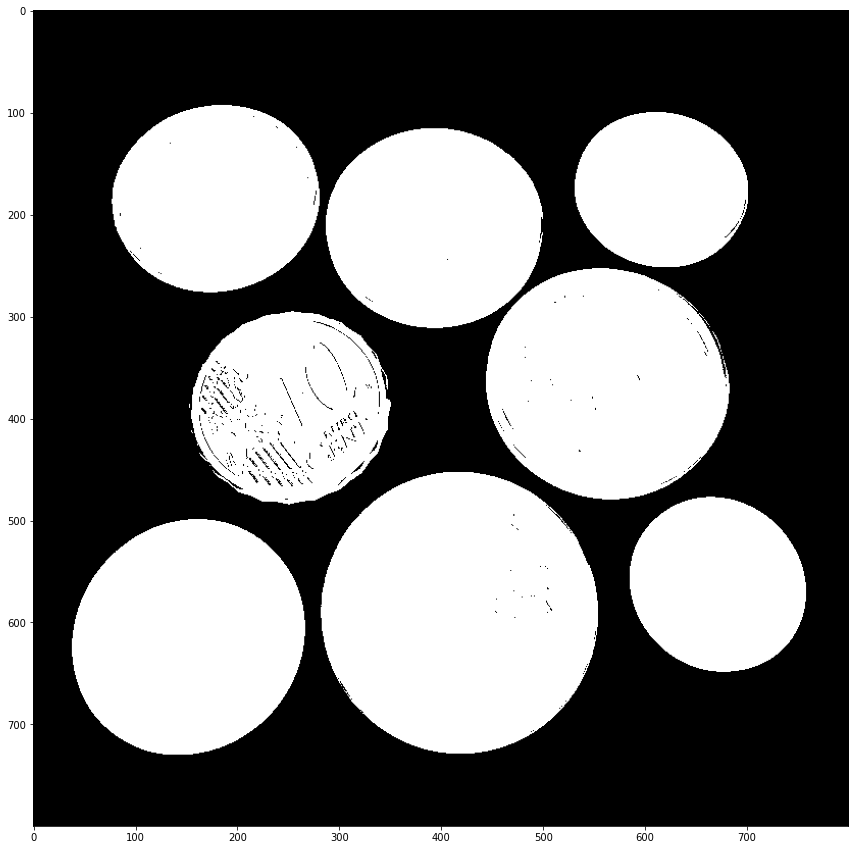

In [34]:
retval, dst = cv2.threshold(grayscale_coins,200,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(20,15))
plt.imshow(dst,cmap="gray")

In [35]:
contours, hierarcy = cv2.findContours(dst,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [36]:
sorted_contours = sorted(contours, key = cv2.contourArea,reverse=True )

In [37]:
len(sorted_contours)

19

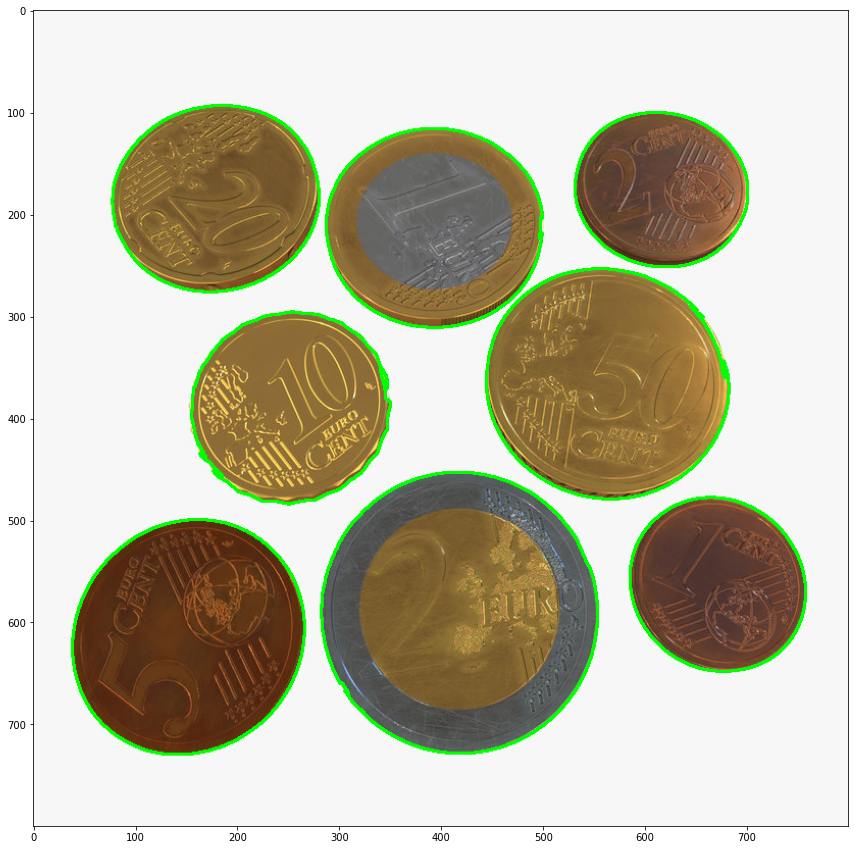

In [38]:
copy = rgb_coins.copy()
cv2.drawContours(copy,sorted_contours[0:8],-1,(0,255,0),2)
plt.figure(figsize=(20,15))
plt.imshow(copy)

In [39]:
def sort_contours(cnts,method="left-to-right"):
    # initialize the reverse flag and sort index,
    reverse = False
    i=0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts,boundingBoxes),key=lambda b:b[1][i],reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return(cnts,boundingBoxes)

    

In [40]:
left_to_right_contours, bb = sort_contours(sorted_contours[0:9])

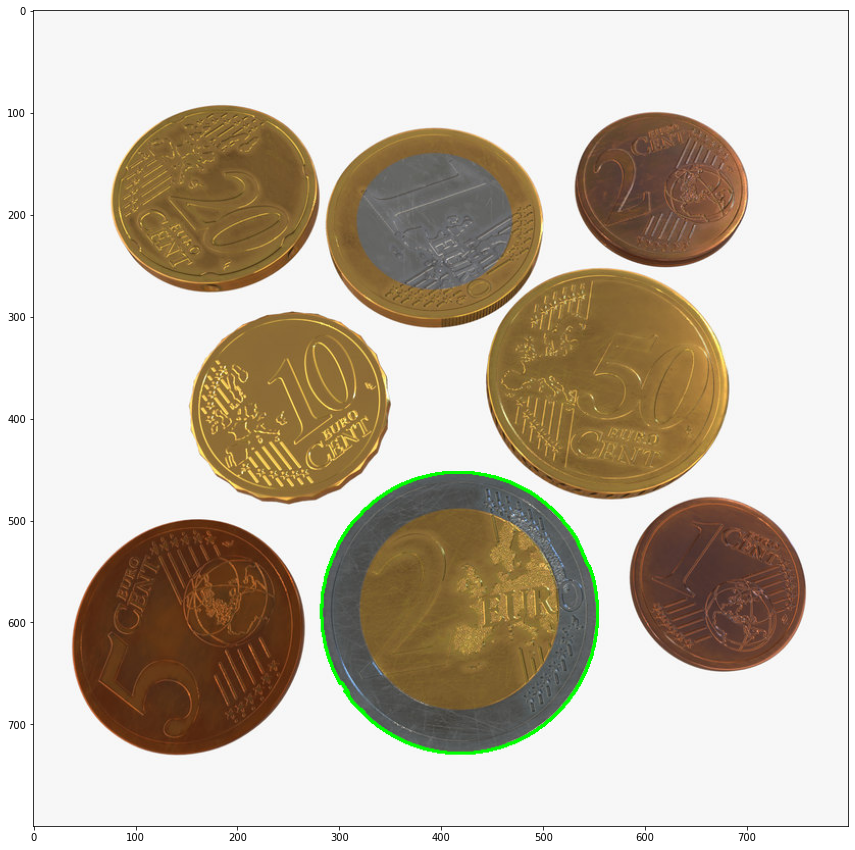

In [41]:
copy = rgb_coins.copy()
cv2.drawContours(copy,left_to_right_contours,3,(0,255,0),2)
plt.figure(figsize=(20,15))
plt.imshow(copy)

In [42]:
clean_contours = sorted_contours[0:9]

In [43]:
# Bounding rectangle
x,y,w,h = cv2.boundingRect(clean_contours[0])

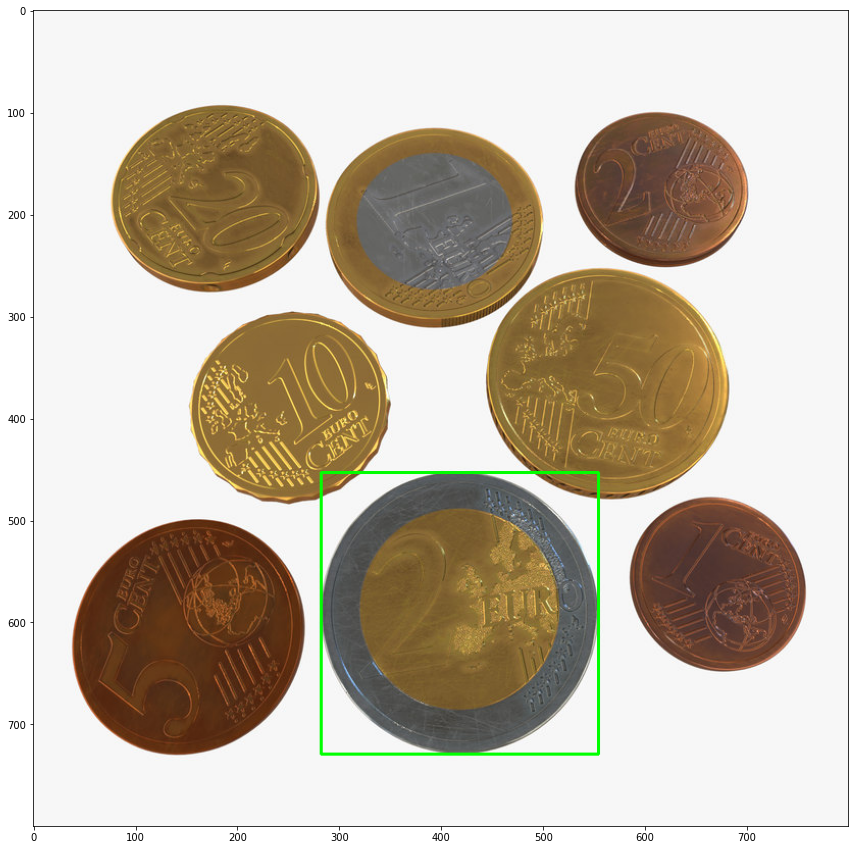

In [46]:
copy = rgb_coins.copy()
cv2.rectangle(copy, (x,y), (x+w, y+h),(0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

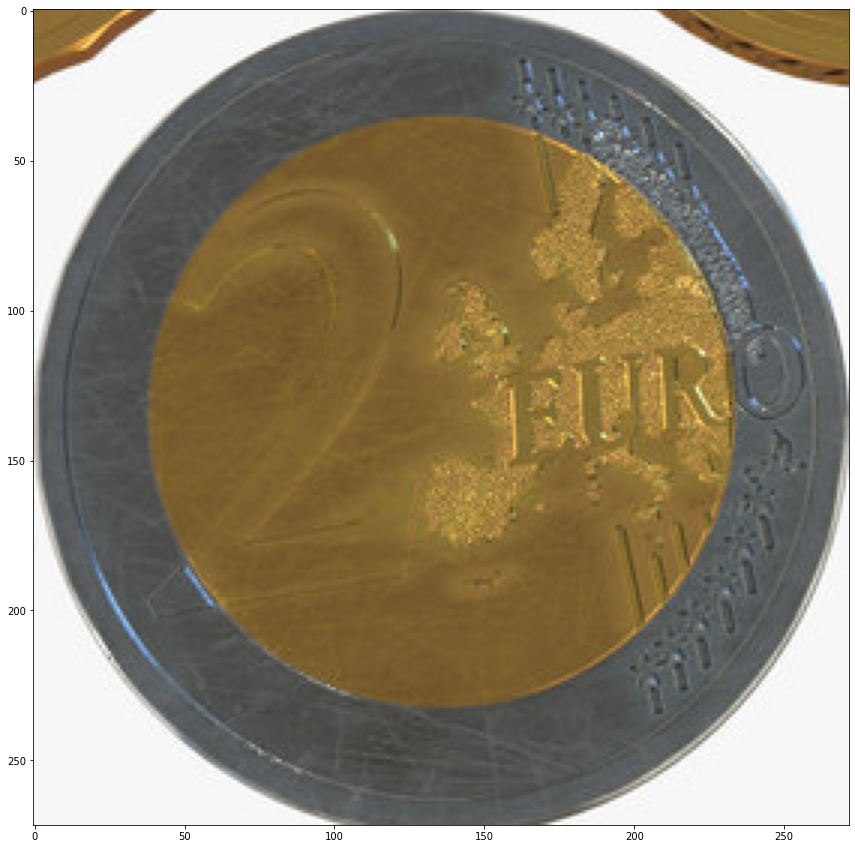

In [47]:
two_euro_coin = rgb_coins[y:y+w, x:x+w]
plt.figure(figsize=(15,15))
plt.imshow(two_euro_coin)

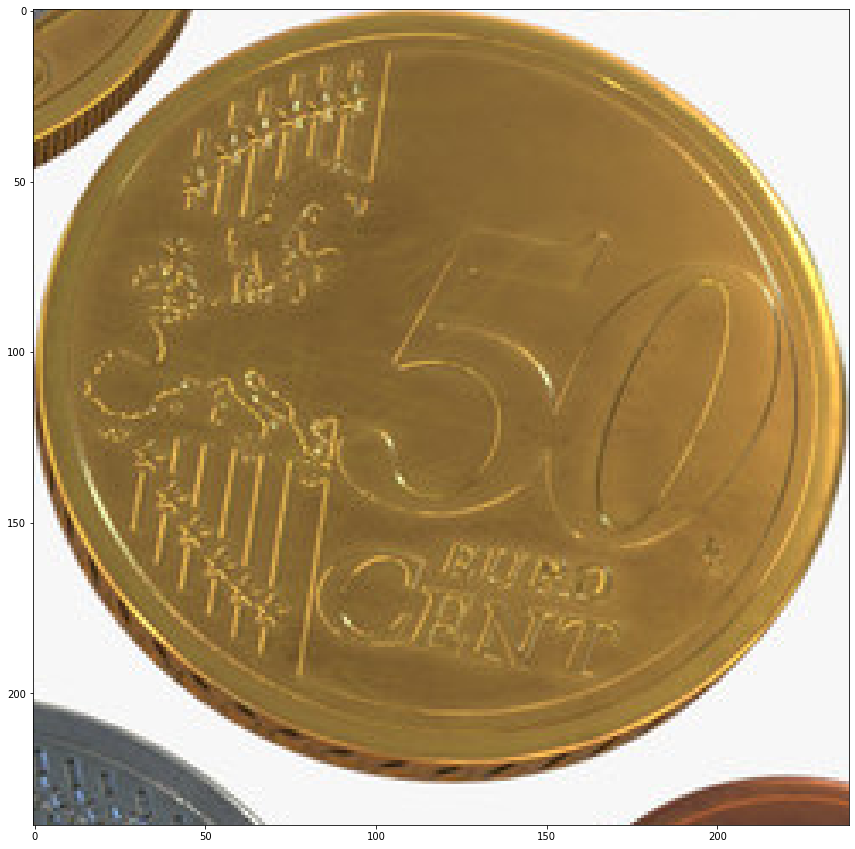

In [48]:
x, y, w, h = cv2.boundingRect(clean_contours[1])
fifty_cents_coin = rgb_coins[y:y+w, x:x+w]
plt.figure(figsize=(15,15))
plt.imshow(fifty_cents_coin)

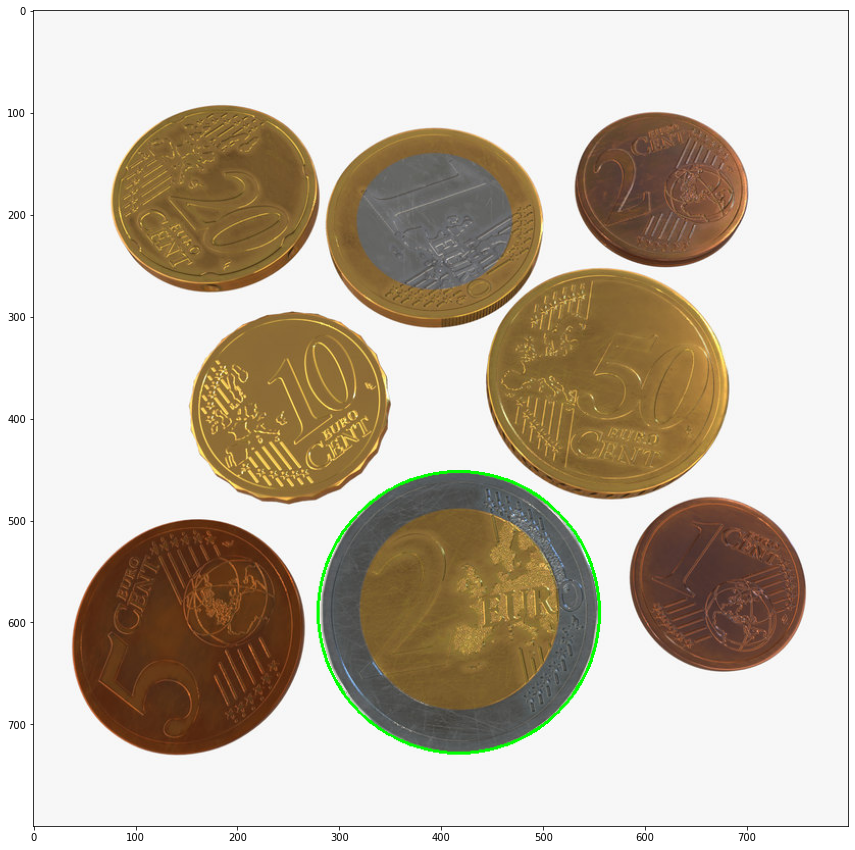

In [49]:
(x,y), radius = cv2.minEnclosingCircle(clean_contours[0])
x = int(x)
y = int(y)
radius = int(radius)

copy = rgb_coins.copy()
cv2.circle(copy, (x,y), radius,(0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

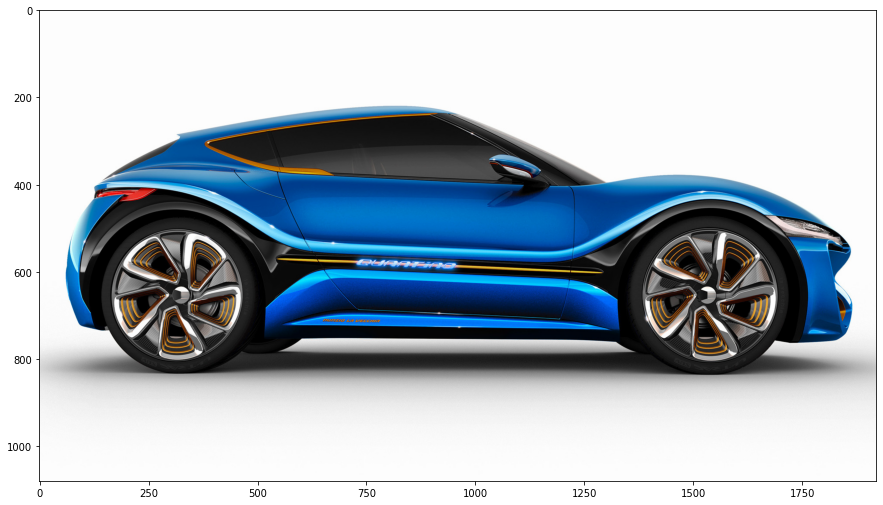

In [80]:
car = cv2.imread('img/car10.jpg')
rgb_car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
gray_car = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.imshow(rgb_car)

In [85]:
ret,thresh = cv2.threshold(gray_car,220,255,cv2.THRESH_BINARY_INV)
contours,hierarcy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [86]:
len(contours)

271

In [87]:
sorted_contours = sorted(contours, key = cv2.contourArea,reverse=True )

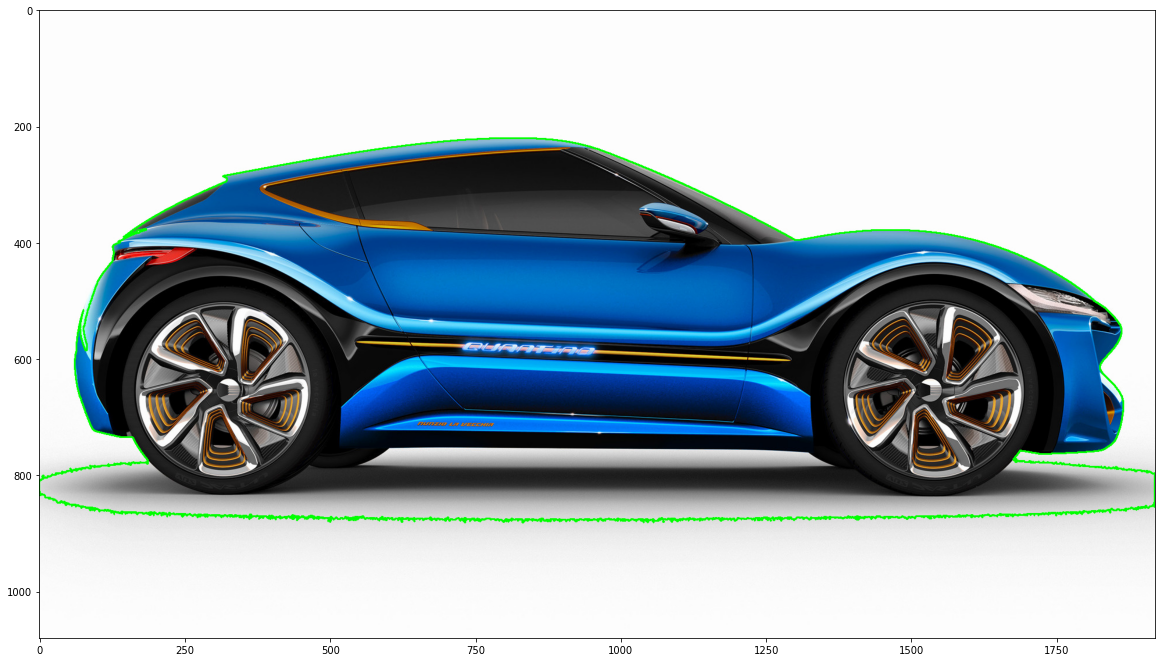

In [88]:
copy = rgb_car.copy()
cv2.drawContours(copy,sorted_contours[0:8],-1,(0,255,0),2)
plt.figure(figsize=(20,15))
plt.imshow(copy)

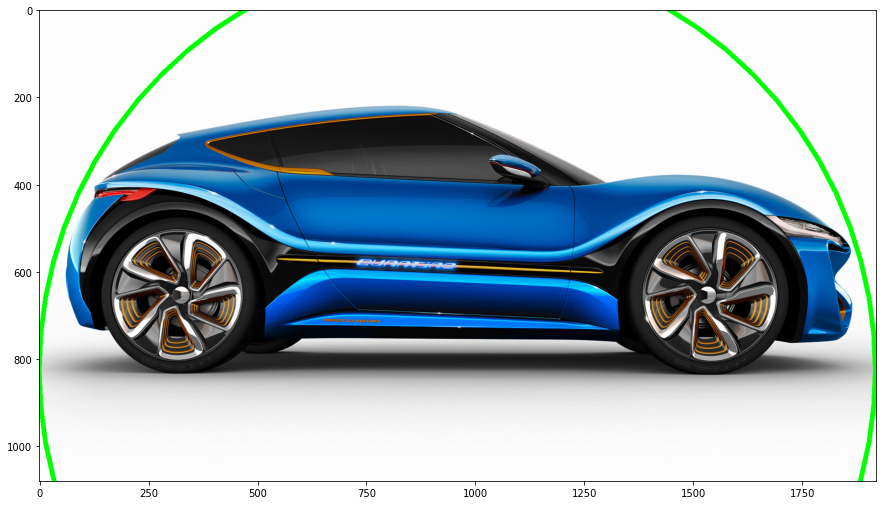

In [89]:
(x,y), radius = cv2.minEnclosingCircle(sorted_contours[0])
x = int(x)
y = int(y)
radius = int(radius)

copy = rgb_car.copy()
cv2.circle(copy, (x,y), radius,(0, 255, 0), 10)
plt.figure(figsize=(15,15))
plt.imshow(copy)

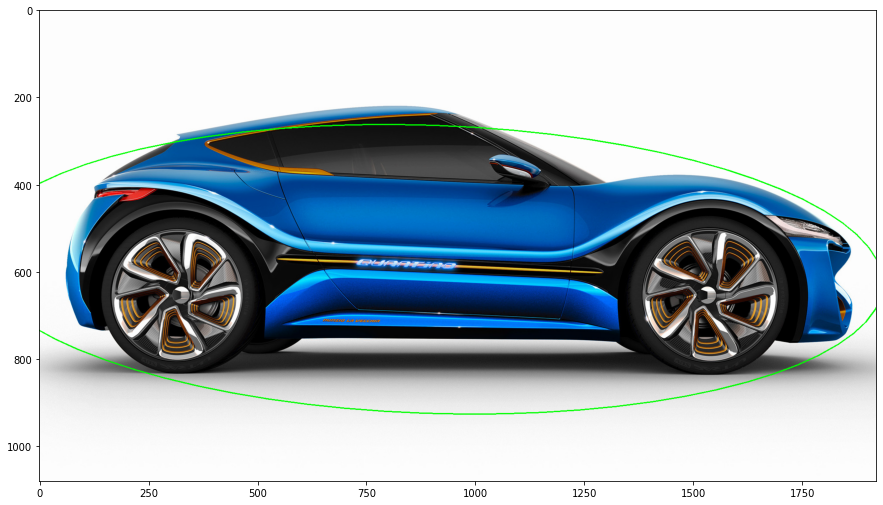

In [91]:
copy = rgb_car.copy()

ellipse = cv2.fitEllipse(sorted_contours[0])
cv2.ellipse(copy,ellipse,(0,255,0),2)

plt.figure(figsize=(15,15))
plt.imshow(copy)

In [ ]:
# Convex Hull
img = cv2.imread("img/hand.jpg")
img_gray = cv2.imreaad("img/hand.jpg",cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(gray_car,220,255,cv2.THRESH_BINARY_INV)
 